In [1]:
import pandas as pd

# Read the CSV file into a DataFrame
file_path= "SoilData.csv"

# Read the CSV file into a DataFrame with a different encoding
df = pd.read_csv(file_path, encoding='latin1')

# Display the DataFrame
print(df)



      ï»¿StudyID ExperimentID Author_F Author_G  YearPublication  \
0              1          1-1    Abawi     G.S.             2000   
1              1          1-1    Abawi     G.S.             2000   
2              1          1-2    Abawi     G.S.             2000   
3              1          1-1    Abawi     G.S.             2000   
4              1          1-4    Abawi     G.S.             2000   
...          ...          ...      ...      ...              ...   
5902         321        321-2    Banda    A. Z.             1994   
5903         321        321-3    Banda    A. Z.             1994   
5904         321        321-1    Banda    A. Z.             1994   
5905         321        321-2    Banda    A. Z.             1994   
5906         321        321-3    Banda    A. Z.             1994   

      SamplingYear               Journal SiteInfor Country  Latitude  ...  \
0              NaN  Applied Soil Ecology  New York     USA     40.71  ...   
1              NaN  Applied S

C:\Temp\ipykernel_21460\218545795.py:7: DtypeWarning: Columns (16,19,20,52,77,122,150,152,160,192,197,212,232,237,242,247,252,262,265,266) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin1')


In [2]:
print(df.columns)


Index(['ï»¿StudyID', 'ExperimentID', 'Author_F', 'Author_G', 'YearPublication',
       'SamplingYear', 'Journal', 'SiteInfor', 'Country', 'Latitude',
       ...
       'Microelement', 'SQI', 'ESS', 'Texture_C', 'Comments1', 'Comments2',
       'Comments3', 'Unnamed: 270', 'Unnamed: 271', 'Unnamed: 272'],
      dtype='object', length=273)


In [3]:
# Find the total number of columns
total_columns = df.shape[1]

# Print the total number of columns
print(f'Total number of columns: {total_columns}')


Total number of columns: 273


In [4]:
# Specify the names of the columns you want to keep
columns_to_keep = [
    'SoilFamily', 'CoverCrop', 'CoverCropGroup',
    'GrainCrop', 'GrainCropGroup',
    'Texture', 'SoilpH', 'SiteInfor', 'Country',
    'Latitude', 'Longitude', 'Elevation',
    'Tannual', 'MAT', 'MAP'
]

# Check if all specified columns exist in the DataFrame
missing_columns = [col for col in columns_to_keep if col not in df.columns]
if missing_columns:
    print(f"Columns not found in DataFrame: {missing_columns}")
else:
    # Filter columns by name
    df_filtered = df[columns_to_keep]

    # Display the DataFrame with filtered columns
    print(df_filtered)


     SoilFamily       CoverCrop CoverCropGroup            GrainCrop  \
0           NaN    White_clover         Legume  Bean/Beet/Corn/Bean   
1           NaN           Vetch         Legume  Bean/Beet/Corn/Bean   
2           NaN   White_mustard       Brassica  Bean/Beet/Corn/Bean   
3           NaN         Alfalfa         Legume  Bean/Beet/Corn/Bean   
4           NaN        Ryegrass            Rye  Bean/Beet/Corn/Bean   
...         ...             ...            ...                  ...   
5902  Cambisols  Hawaiian giant  BroadleafTree                Maize   
5903  Cambisols      Cunningham  BroadleafTree                Maize   
5904  Cambisols            Peru  BroadleafTree                Maize   
5905  Cambisols  Hawaiian giant  BroadleafTree                Maize   
5906  Cambisols      Cunningham  BroadleafTree                Maize   

     GrainCropGroup       Texture  SoilpH SiteInfor Country  Latitude  \
0               MTT  NotAvailable     NaN  New York     USA     40.71   
1

In [5]:
def nan_sum_per_column(df):

    """
    Calculate the sum of NaN values in each column of a DataFrame.

    Parameters:
    - df: pandas DataFrame

    Returns:
    - pandas Series containing the sum of NaN values for each column
    """
    nan_sums= df.isna().sum()
    for column, nan_sum in nan_sums.items():
        print(f"Sum of NA in {column}: {nan_sum}") 


nan_sum_per_column(df_filtered)




Sum of NA in SoilFamily: 1649
Sum of NA in CoverCrop: 856
Sum of NA in CoverCropGroup: 845
Sum of NA in GrainCrop: 412
Sum of NA in GrainCropGroup: 291
Sum of NA in Texture: 981
Sum of NA in SoilpH: 3433
Sum of NA in SiteInfor: 54
Sum of NA in Country: 0
Sum of NA in Latitude: 23
Sum of NA in Longitude: 23
Sum of NA in Elevation: 410
Sum of NA in Tannual: 5374
Sum of NA in MAT: 4472
Sum of NA in MAP: 2832


In [6]:
df_filtered.dropna(subset=['SiteInfor'], inplace=True)
df_filtered.dropna(subset=['SoilFamily'], inplace=True)


C:\Temp\ipykernel_21460\3821596149.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['SiteInfor'], inplace=True)
C:\Temp\ipykernel_21460\3821596149.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(subset=['SoilFamily'], inplace=True)


In [7]:
df_filtered['MAT'] = df_filtered['MAT'].fillna(df_filtered.groupby('SiteInfor')['MAT'].transform('mean'))
df_filtered['MAT'] = df_filtered['MAT'].fillna(df_filtered['MAT'].mean())

df_filtered['MAP'] = df_filtered['MAP'].fillna(df_filtered.groupby('SiteInfor')['MAP'].transform('mean'))
df_filtered['MAP'] = df_filtered['MAP'].fillna(df_filtered['MAP'].mean())

df_filtered['Tannual'] = df_filtered['Tannual'].fillna(df_filtered.groupby('SiteInfor')['Tannual'].transform('mean'))
df_filtered['Tannual'] = df_filtered['Tannual'].fillna(df_filtered['Tannual'].mean())

df_filtered['Elevation'] = df_filtered['Elevation'].fillna(df_filtered.groupby('SiteInfor')['Elevation'].transform('mean'))
df_filtered['Elevation'] = df_filtered['Elevation'].fillna(df_filtered['Elevation'].mean())

df_filtered['SoilpH'] = df_filtered['SoilpH'].fillna(df_filtered.groupby('SoilFamily')['SoilpH'].transform('mean'))
df_filtered['SoilpH'] = df_filtered['SoilpH'].fillna(df_filtered['SoilpH'].mean())

df_filtered.dropna(subset=['CoverCrop'], inplace=True)
df_filtered.dropna(subset=['CoverCropGroup'], inplace=True)
df_filtered.dropna(subset=['GrainCrop'], inplace=True)
df_filtered.dropna(subset=['Texture'], inplace=True)


C:\Temp\ipykernel_21460\2890070115.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['MAT'] = df_filtered['MAT'].fillna(df_filtered.groupby('SiteInfor')['MAT'].transform('mean'))
C:\Temp\ipykernel_21460\2890070115.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['MAT'] = df_filtered['MAT'].fillna(df_filtered['MAT'].mean())
C:\Temp\ipykernel_21460\2890070115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [8]:
nan_sum_per_column(df_filtered)


Sum of NA in SoilFamily: 0
Sum of NA in CoverCrop: 0
Sum of NA in CoverCropGroup: 0
Sum of NA in GrainCrop: 0
Sum of NA in GrainCropGroup: 0
Sum of NA in Texture: 0
Sum of NA in SoilpH: 0
Sum of NA in SiteInfor: 0
Sum of NA in Country: 0
Sum of NA in Latitude: 0
Sum of NA in Longitude: 0
Sum of NA in Elevation: 0
Sum of NA in Tannual: 0
Sum of NA in MAT: 0
Sum of NA in MAP: 0


In [9]:
df_filtered.head()

,SoilFamily,CoverCrop,CoverCropGroup,GrainCrop,GrainCropGroup,Texture,SoilpH,SiteInfor,Country,Latitude,Longitude,Elevation,Tannual,MAT,MAP
11,Pachic Ultic Argixeroll,Rye,Rye,Corn/Wheat/Broccoli,MTT,Silt loam,6.266667,North Willamette Research and Extension Ce...,USA,45.23,-122.76,48.4,15.335663,13.457332,1040.00000
12,Pachic Ultic Argixeroll,Red_clover,Legume,Corn/Wheat/Broccoli,MTT,Silt loam,6.266667,North Willamette Research and Extension Ce...,USA,45.23,-122.76,48.4,15.335663,13.457332,1040.00000
13,Haplustoll,Rye_Fall_seeded_winter,Rye,Dry_bean,Vegetable,Loam,6.189685,"Lethbridge, AB, Canada",Canada,49.69,-112.84,901.0,15.335663,13.457332,944.28081
14,Haplustoll,Barley_Fall_seeded,Grass,Dry_bean,Vegetable,Loam,6.189685,"Lethbridge, AB, Canada",Canada,49.69,-112.84,901.0,15.335663,13.457332,944.28081
15,Haplustoll,Oat_Fall_seeded,Grass,Dry_bean,Vegetable,Loam,6.189685,"Lethbridge, AB, Canada",Canada,49.69,-112.84,901.0,15.335663,13.457332,944.28081


In [11]:
df_filtered.tail()

,SoilFamily,CoverCrop,CoverCropGroup,GrainCrop,GrainCropGroup,Texture,SoilpH,SiteInfor,Country,Latitude,Longitude,Elevation,Tannual,MAT,MAP
5902,Cambisols,Hawaiian giant,BroadleafTree,Maize,Corn,Sandy loam,6.189685,Nkhande,Malawi,-14.78,34.6,1260.0,15.335663,21.0,1125.0
5903,Cambisols,Cunningham,BroadleafTree,Maize,Corn,Sandy loam,6.189685,Nkhande,Malawi,-14.78,34.6,1260.0,15.335663,21.0,1125.0
5904,Cambisols,Peru,BroadleafTree,Maize,Corn,Sandy loam,6.189685,Nkhande,Malawi,-14.78,34.6,1260.0,15.335663,21.0,1125.0
5905,Cambisols,Hawaiian giant,BroadleafTree,Maize,Corn,Sandy loam,6.189685,Nkhande,Malawi,-14.78,34.6,1260.0,15.335663,21.0,1125.0
5906,Cambisols,Cunningham,BroadleafTree,Maize,Corn,Sandy loam,6.189685,Nkhande,Malawi,-14.78,34.6,1260.0,15.335663,21.0,1125.0


In [12]:
df_filtered.shape

(3451, 15)

In [13]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3451 entries, 11 to 5906
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SoilFamily      3451 non-null   object 
 1   CoverCrop       3451 non-null   object 
 2   CoverCropGroup  3451 non-null   object 
 3   GrainCrop       3451 non-null   object 
 4   GrainCropGroup  3451 non-null   object 
 5   Texture         3451 non-null   object 
 6   SoilpH          3451 non-null   float64
 7   SiteInfor       3451 non-null   object 
 8   Country         3451 non-null   object 
 9   Latitude        3451 non-null   float64
 10  Longitude       3451 non-null   float64
 11  Elevation       3451 non-null   float64
 12  Tannual         3451 non-null   float64
 13  MAT             3451 non-null   float64
 14  MAP             3451 non-null   float64
dtypes: float64(7), object(8)
memory usage: 431.4+ KB


In [14]:
df_filtered.describe()

,SoilpH,Latitude,Longitude,Elevation,Tannual,MAT,MAP
count,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000,3451.000000
mean,6.214802,23.149000,-40.475995,426.358787,15.399981,13.819663,983.554992
std,0.791348,24.079934,65.720973,467.950242,1.414721,2.528874,283.871804
min,4.350000,-43.760000,-123.260000,1.700000,3.300000,4.900000,42.100000
25%,5.900000,4.850000,-88.250000,55.300000,15.335663,13.457332,944.280810
50%,6.189685,35.000000,-77.650000,223.000000,15.335663,13.457332,944.280810
75%,6.250000,40.100000,17.120000,838.000000,15.335663,13.457332,975.000000
max,8.700000,59.810000,172.020000,2000.000000,22.700000,27.000000,2400.000000


In [15]:
df_filtered.groupby('GrainCropGroup').count()

,SoilFamily,CoverCrop,CoverCropGroup,GrainCrop,Texture,SoilpH,SiteInfor,Country,Latitude,Longitude,Elevation,Tannual,MAT,MAP
GrainCropGroup,,,,,,,,,,,,,,
AVG,100,100,100,100,100,100,100,100,100,100,100,100,100,100
Arable,457,457,457,457,457,457,457,457,457,457,457,457,457,457
CO,90,90,90,90,90,90,90,90,90,90,90,90,90,90
CS,160,160,160,160,160,160,160,160,160,160,160,160,160,160
CSO,14,14,14,14,14,14,14,14,14,14,14,14,14,14
CSW,44,44,44,44,44,44,44,44,44,44,44,44,44,44
CV,87,87,87,87,87,87,87,87,87,87,87,87,87,87
CVO,26,26,26,26,26,26,26,26,26,26,26,26,26,26
CW,11,11,11,11,11,11,11,11,11,11,11,11,11,11


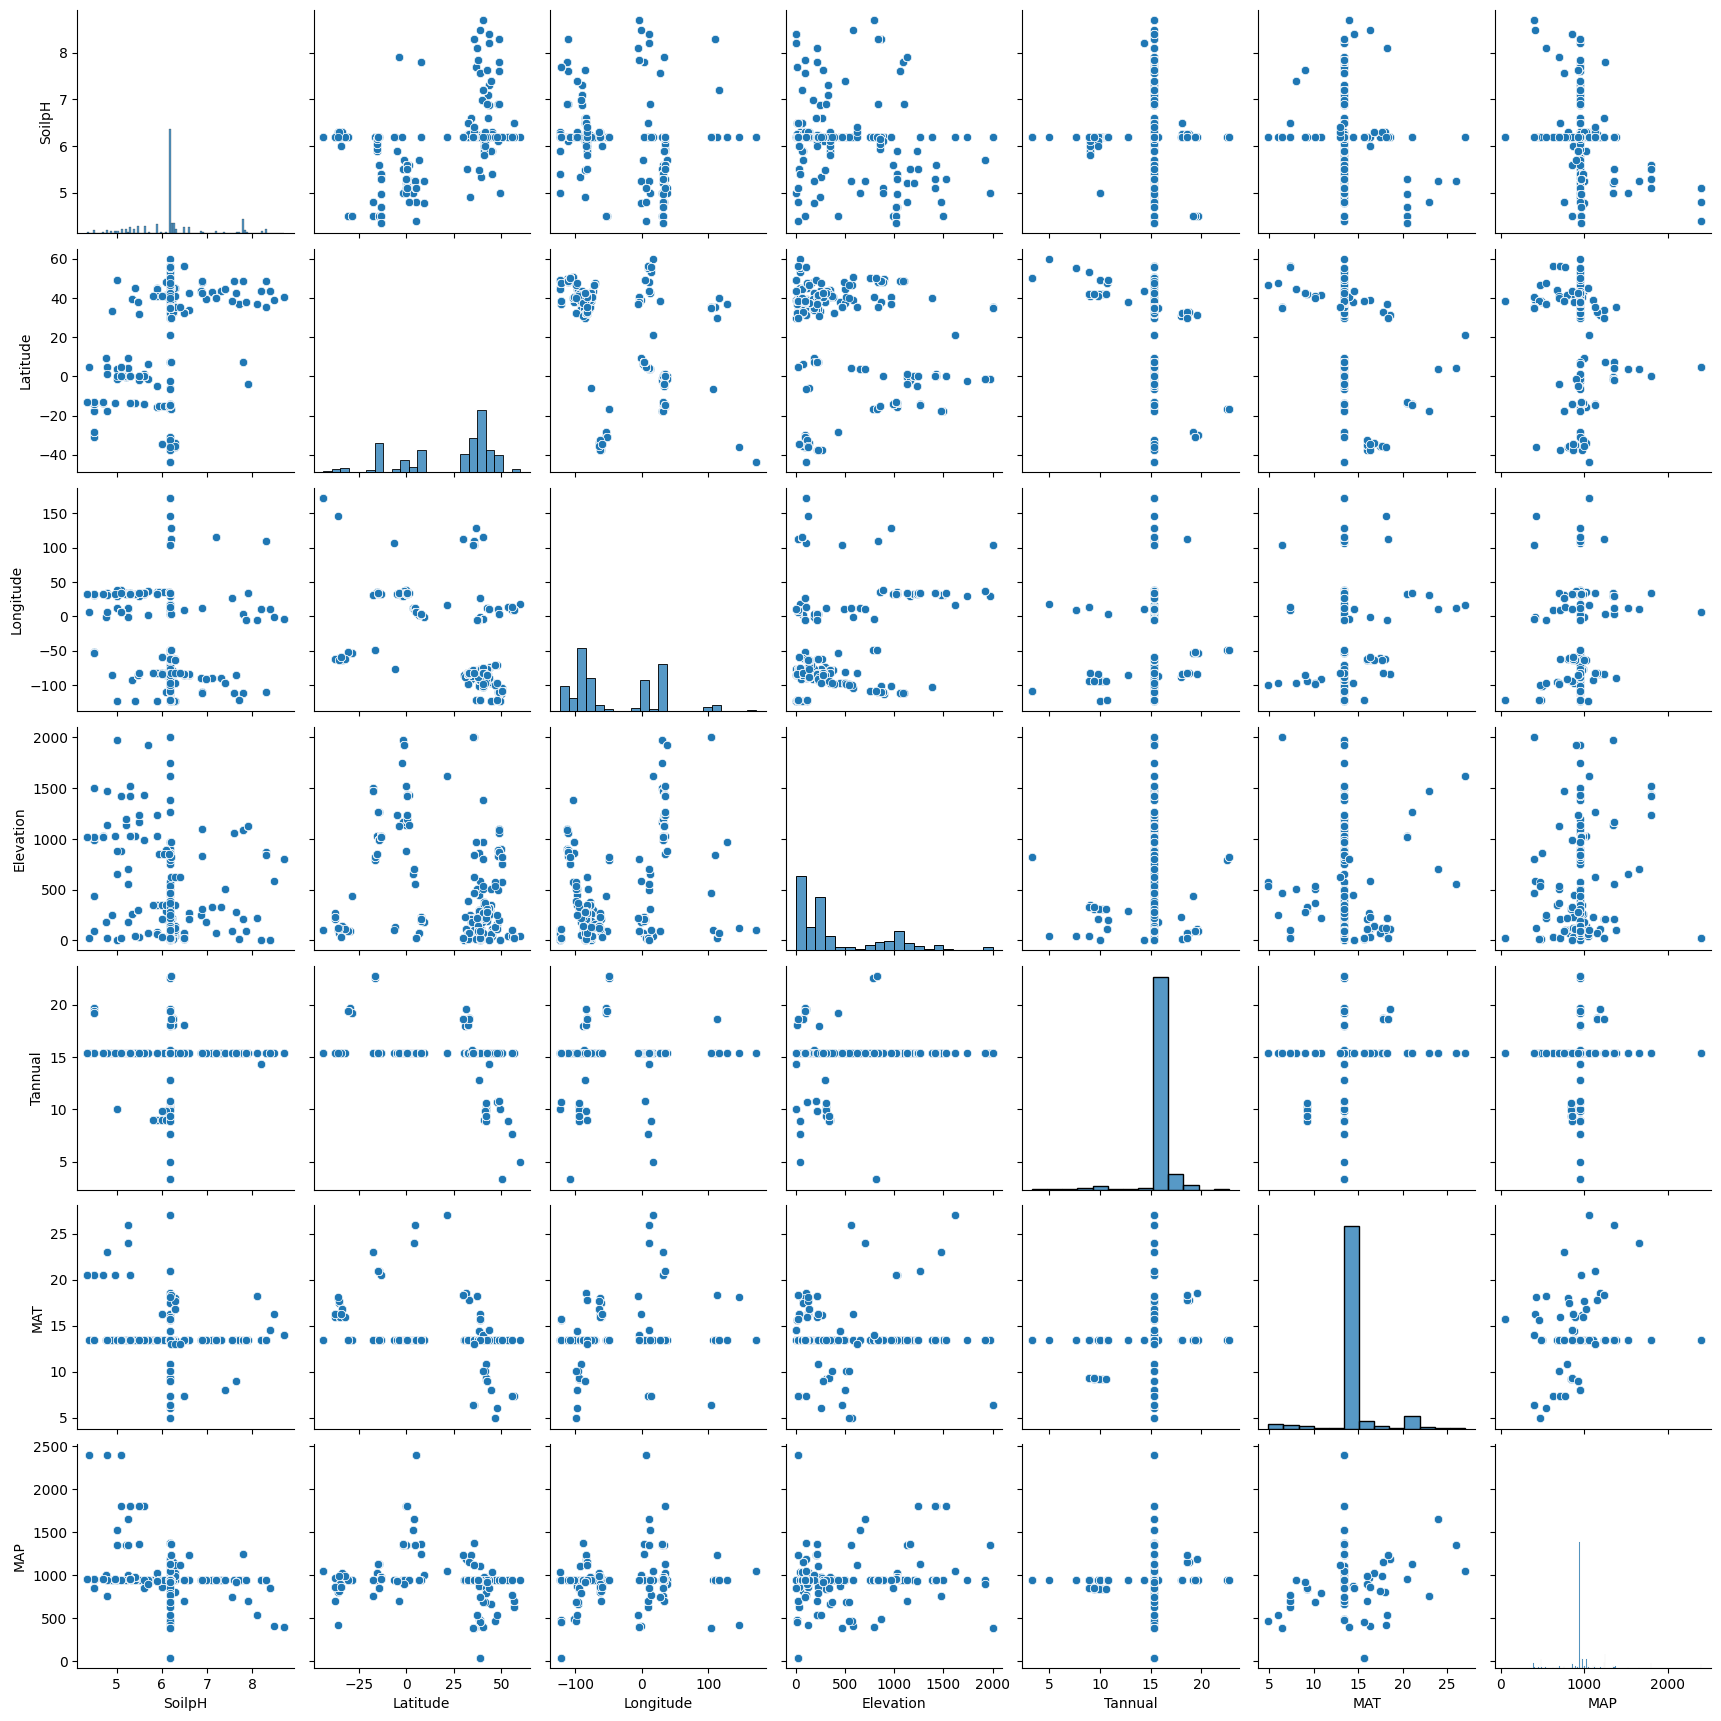

In [16]:
import seaborn as sns
sns.pairplot(df_filtered)

Text(0.5, 1.0, 'MAT')

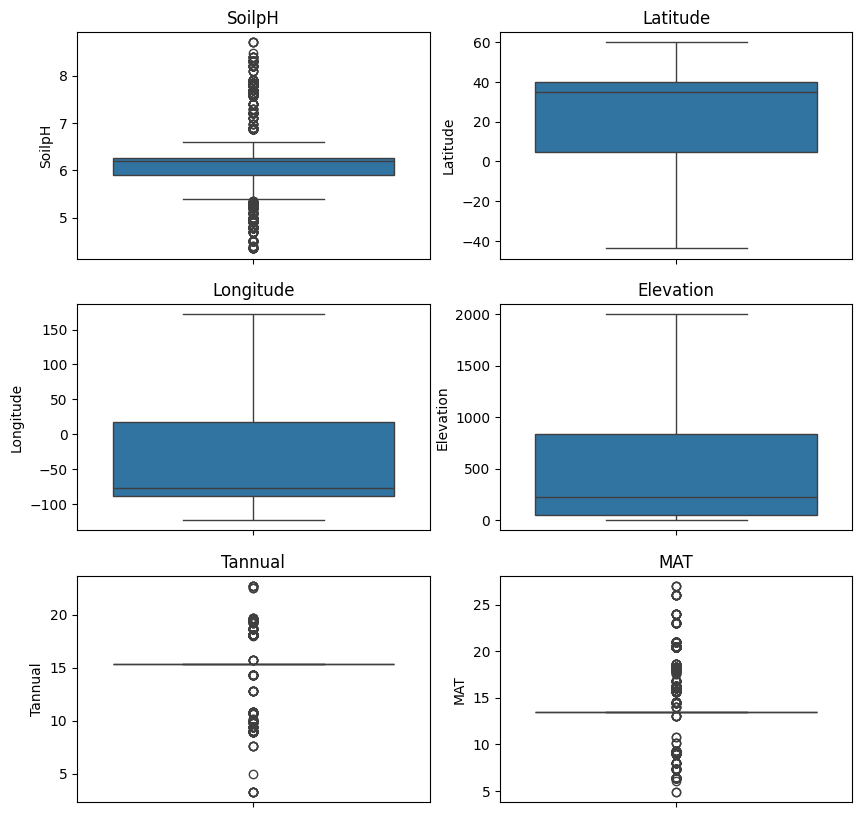

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,10))

plt.subplot(3,2,1)
sns.boxplot(data= df_filtered['SoilpH'])
plt.title('SoilpH')


plt.subplot(3,2,2)
sns.boxplot(data= df_filtered['Latitude'])
plt.title('Latitude')

plt.subplot(3,2,3)
sns.boxplot(data= df_filtered['Longitude'])
plt.title('Longitude')

plt.subplot(3,2,4)
sns.boxplot(data= df_filtered['Elevation'])
plt.title('Elevation')

plt.subplot(3,2,5)
sns.boxplot(data= df_filtered['Tannual'])
plt.title('Tannual')


plt.subplot(3,2,6)
sns.boxplot(data= df_filtered['MAT'])
plt.title('MAT')



Text(0.5, 1.0, 'Heatmap')

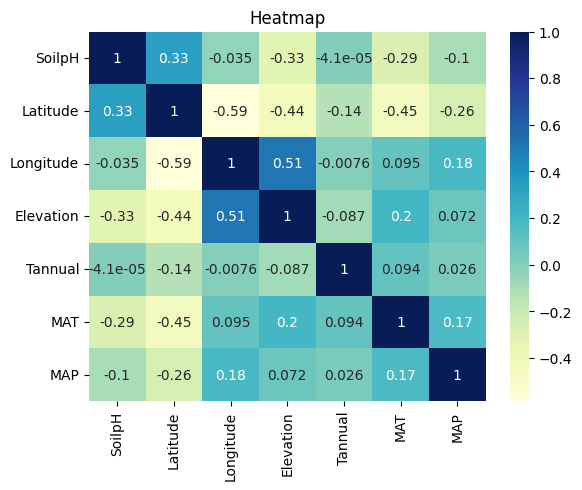

In [18]:
num_cor = df_filtered.select_dtypes(['int64','float64']).corr()
sns.heatmap(num_cor,cmap = 'YlGnBu',annot = True)
plt.title('Heatmap')

<Axes: xlabel='SoilpH', ylabel='Count'>

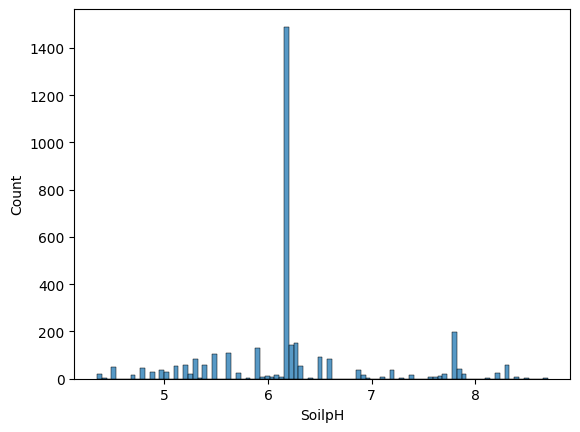

In [19]:
sns.histplot(df_filtered, x = 'SoilpH' )


<Axes: xlabel='MAT', ylabel='Count'>

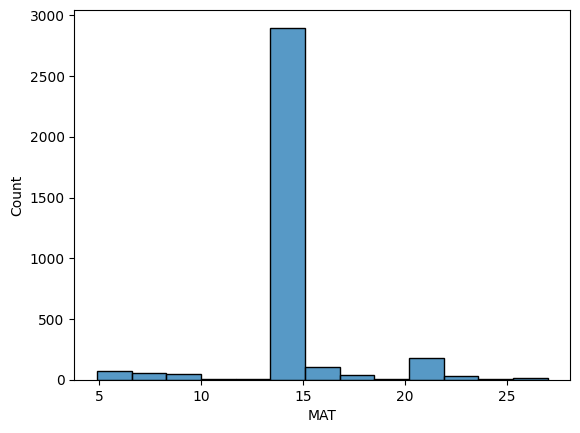

In [20]:
sns.histplot(df_filtered, x = 'MAT' )


<Axes: xlabel='MAP', ylabel='Count'>

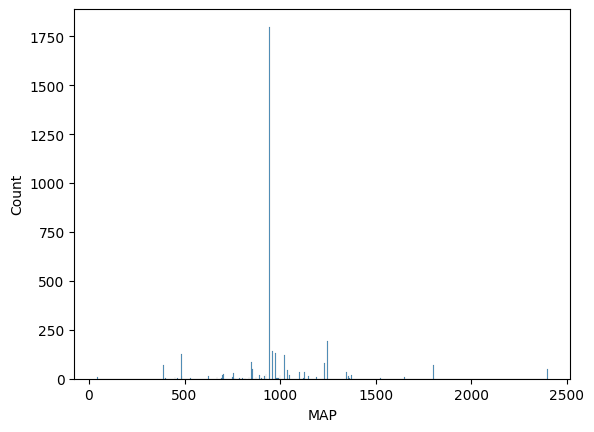

In [21]:
sns.histplot(df_filtered, x = 'MAP' )


In [22]:
from sklearn.preprocessing import LabelEncoder

def label_encode_all_categorical_columns(df):
    """
    Automatically label encode all categorical columns in a DataFrame.

    Parameters:
    - df (pd.DataFrame): Input DataFrame.

    Returns:
    - pd.DataFrame: DataFrame with label-encoded categorical columns.
    """
    df_filtered_encoded = df_filtered.copy()

    label_encoder = LabelEncoder()

    # Identify categorical columns
    categorical_columns = df_filtered.select_dtypes(include=['object']).columns

    # Label encode each categorical column
    for column in categorical_columns:
        df_filtered_encoded[column + '_encoded'] = label_encoder.fit_transform(df_filtered[column])

    return df_filtered_encoded


df_filtered_encoded = label_encode_all_categorical_columns(df_filtered)


In [23]:
df_filtered_encoded.head()

,SoilFamily,CoverCrop,CoverCropGroup,GrainCrop,GrainCropGroup,Texture,SoilpH,SiteInfor,Country,Latitude,...,MAT,MAP,SoilFamily_encoded,CoverCrop_encoded,CoverCropGroup_encoded,GrainCrop_encoded,GrainCropGroup_encoded,Texture_encoded,SiteInfor_encoded,Country_encoded
11,Pachic Ultic Argixeroll,Rye,Rye,Corn/Wheat/Broccoli,MTT,Silt loam,6.266667,North Willamette Research and Extension Ce...,USA,45.23,...,13.457332,1040.00000,94,174,18,30,11,11,135,24
12,Pachic Ultic Argixeroll,Red_clover,Legume,Corn/Wheat/Broccoli,MTT,Silt loam,6.266667,North Willamette Research and Extension Ce...,USA,45.23,...,13.457332,1040.00000,94,172,10,30,11,11,135,24
13,Haplustoll,Rye_Fall_seeded_winter,Rye,Dry_bean,Vegetable,Loam,6.189685,"Lethbridge, AB, Canada",Canada,49.69,...,13.457332,944.28081,46,185,18,35,17,4,108,4
14,Haplustoll,Barley_Fall_seeded,Grass,Dry_bean,Vegetable,Loam,6.189685,"Lethbridge, AB, Canada",Canada,49.69,...,13.457332,944.28081,46,23,6,35,17,4,108,4
15,Haplustoll,Oat_Fall_seeded,Grass,Dry_bean,Vegetable,Loam,6.189685,"Lethbridge, AB, Canada",Canada,49.69,...,13.457332,944.28081,46,144,6,35,17,4,108,4


In [24]:
df_filtered_encoded['OptimalCrop'] = df_filtered_encoded['GrainCrop_encoded']

In [25]:
import pandas as pd
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler

# Assuming df_filtered_encoded is your DataFrame
# Drop the columns that are not needed for training
X = df_filtered_encoded.drop(['OptimalCrop', 'SoilFamily', 'CoverCrop', 'CoverCropGroup', 'GrainCrop', 'GrainCrop_encoded', 'GrainCropGroup', 'Texture', 'SiteInfor', 'Country'], axis=1)
y = df_filtered_encoded['OptimalCrop']

# Oversample the minority class
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Create models
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost_model = XGBClassifier(n_estimators=100, random_state=42)  # Use XGBClassifier

# Use KFold with the resampled data
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Evaluate Decision Tree
dt_scores = cross_val_score(decision_tree_model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
print("Decision Tree Cross-Validation Scores:", dt_scores)
print("Decision Tree Mean Accuracy:", dt_scores.mean())

dt_cv_predictions = cross_val_predict(decision_tree_model, X_resampled, y_resampled, cv=kf)
print("\nClassification Report - Decision Tree:")
print(classification_report(y_resampled, dt_cv_predictions))



Decision Tree Cross-Validation Scores: [0.89438046 0.8968485  0.88944437 0.89601924 0.8947535 ]
Decision Tree Mean Accuracy: 0.8942892136784699

Classification Report - Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       823
           2       1.00      1.00      1.00       823
           3       1.00      1.00      1.00       823
           4       1.00      1.00      1.00       823
           5       1.00      1.00      1.00       823
           6       1.00      1.00      1.00       823
           7       1.00      1.00      1.00       823
           8       1.00      1.00      1.00       823
           9       1.00      1.00      1.00       823
          10       1.00      1.00      1.00       823
          11       1.00      1.00      1.00       823
          12       1.00      1.00      1.00       823
          13       1.00      1.00      1.00       823
     

In [26]:
# Evaluate Random Forest
rf_scores = cross_val_score(random_forest_model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:", rf_scores)
print("Random Forest Mean Accuracy:", rf_scores.mean())


rf_cv_predictions = cross_val_predict(random_forest_model, X_resampled, y_resampled, cv=kf)
print("\nClassification Report - Random Forest:")
print(classification_report(y_resampled, rf_cv_predictions))


Random Forest Cross-Validation Scores: [0.89507657 0.89691178 0.88944437 0.89595595 0.89488007]
Random Forest Mean Accuracy: 0.8944537506141378

Classification Report - Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       823
           1       1.00      1.00      1.00       823
           2       1.00      1.00      1.00       823
           3       1.00      1.00      1.00       823
           4       1.00      1.00      1.00       823
           5       1.00      1.00      1.00       823
           6       1.00      1.00      1.00       823
           7       1.00      1.00      1.00       823
           8       1.00      1.00      1.00       823
           9       1.00      1.00      1.00       823
          10       1.00      1.00      1.00       823
          11       1.00      1.00      1.00       823
          12       1.00      1.00      1.00       823
          13       1.00      1.00      1.00       823
    

In [27]:
# Evaluate XGBoost
xgboost_scores = cross_val_score(xgboost_model, X_resampled, y_resampled, cv=kf, scoring='accuracy')
print("\nXGBoost Cross-Validation Scores:", xgboost_scores)
print("XGBoost Mean Accuracy:", xgboost_scores.mean())

xgboost_cv_predictions = cross_val_predict(xgboost_model, X_resampled, y_resampled, cv=kf)
print("\nClassification Report - XGBoost:")
print(classification_report(y_resampled, xgboost_cv_predictions))


XGBoost Cross-Validation Scores: [0.34343754 0.56062524 0.57113024 0.58920321 0.59179799]
XGBoost Mean Accuracy: 0.531238843199626

Classification Report - XGBoost:
              precision    recall  f1-score   support

           0       0.92      0.21      0.34       823
           1       0.47      0.22      0.30       823
           2       0.69      0.86      0.76       823
           3       0.88      0.80      0.84       823
           4       0.52      0.57      0.54       823
           5       0.65      0.82      0.73       823
           6       0.64      0.60      0.62       823
           7       0.89      0.62      0.73       823
           8       0.91      0.81      0.86       823
           9       0.86      1.00      0.93       823
          10       0.66      0.58      0.62       823
          11       0.96      0.79      0.87       823
          12       0.88      0.61      0.72       823
          13       0.74      0.60      0.66       823
          14       0.46

c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\fulbe\anaconda3\envs\SIA\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
